In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from mpl_toolkits import mplot3d
%matplotlib inline


In [ ]:

def metodo_euler(DU, tiempo, q,p, h, iteraciones, masa):  #Derivada de U(q(t))  tiempo, Valores iniciales de q y p, 
    A=np.array([[0,0]])
    for i in range(1,iteraciones):
      newrow=[q,p]
      A = np.vstack([A, newrow])
      tiempo += h
      p = p - h  * DU(q)  
      q = q + h * A[i][1]/masa
    return(A[1:len(A)])

def metodo_euler_simp(DU, tiempo, q,p, h, iteraciones, masa):  #Derivada de U(q(t))  tiempo, Valores iniciales de q y p, 
    A=np.array([[0,0]])
    for i in range(1,iteraciones):
      newrow=[q,p]
      A = np.vstack([A, newrow])
      tiempo += h
      p = p - h  * DU(q)  
      q = q + h * p/masa   # este es el nuevo cambio, que ahora usamos el valor de p más actual.
    return(A[1:len(A)])

def leap_frog(DU, tiempo, q,p, h, iteraciones,masa):  #Derivada de U(q(t))  tiempo, Valores iniciales de q y p, 
    A=np.array([[0,0]])
    for i in range(1,iteraciones):
      newrow=np.array([q,p])
      A = np.vstack([A, newrow])
      tiempo += h
      p_m = p - h/2 * DU(q)
      q = q + h * p_m/masa
      p = p_m - h/2 * DU(q)
    return(A[1:len(A)])

def DU(q):  #Parcial de U respecto de q
    return(-4/q+1)


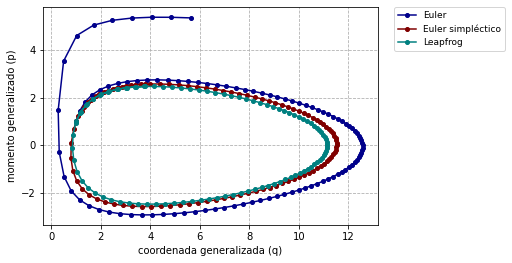

In [ ]:
AS1=metodo_euler(DU,0,1,1,0.15,100,1)  #EULER 
AS2=metodo_euler_simp(DU,0,1,1,0.15,100,1)
AS3=leap_frog(DU,0,1,1,0.15,100,1)
plt.grid(linestyle='dashed')
plt.plot(AS1[:,0],AS1[:,1], color='darkblue', marker='o', markersize=4)
plt.plot(AS2[:,0],AS2[:,1], color='maroon', marker='o',  markersize=4)
plt.plot(AS3[:,0],AS3[:,1], color='teal', marker='o',  markersize=4)

plt.ylabel("momento generalizado (p)")
plt.xlabel('coordenada generalizada (q)')


plt.legend(('Euler','Euler simpléctico', 'Leapfrog'), bbox_to_anchor=(1.05,0.8), loc=3, borderaxespad=0, prop={'size':9})

